# Part 1 of notebook - Data Preparation and EDA

## The Business Problem
Amdari has recently been contacted by a local video-game resale company. Many businesses have to be on point when it comes to ordering supplies to meet the demand of its customers. An overestimation of demand leads to bloated inventory and high costs. Underestimating demand means many valued customers won't get the products they want. 

In order to help plan out the supply with demand for the company's video games, the Data Science Team has been tasked with forecasting monthly sales data in order to synchronize supply with demand, and  aid in decision making that will help build a competitive infrastructure and measure the growing company’s performance.
My team is being asked to provide a forecast for the next 4 months of sales. 

### Import libraries

In [ ]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
sns.set()

## Load the data

In [2]:
raw_data = pd.read_csv('monthly_sales_data.csv')
df = raw_data.copy()

In [3]:
# Display first few rows and basic information
display(df.head())

,Category,Month,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion
0,Sports,2002-01-01,108592,2002,1,Xbox,1,0
1,RPG,2002-02-01,129387,2002,4,Nintendo,0,0
2,Sports,2002-03-01,114777,2002,4,PC,0,0
3,Sports,2002-04-01,71738,2002,0,Nintendo,0,0
4,Simulation,2002-05-01,142512,2002,2,PlayStation,0,0


In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category       264 non-null    object
 1   Month          264 non-null    object
 2   Monthly Sales  264 non-null    int64 
 3   Year           264 non-null    int64 
 4   DayOfWeek      264 non-null    int64 
 5   Platform       264 non-null    object
 6   Holiday        264 non-null    int64 
 7   Promotion      264 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 16.6+ KB


None

In [5]:
display(df.describe())

,Monthly Sales,Year,DayOfWeek,Holiday,Promotion
count,264.000000,264.000000,264.000000,264.000000,264.000000
mean,112349.003788,2012.500000,3.011364,0.166667,0.204545
std,34144.606185,6.356339,1.995209,0.373386,0.404135
min,10469.000000,2002.000000,0.000000,0.000000,0.000000
25%,88873.750000,2007.000000,1.000000,0.000000,0.000000
50%,112947.500000,2012.500000,3.000000,0.000000,0.000000
75%,135193.500000,2018.000000,5.000000,0.000000,0.000000
max,206596.000000,2023.000000,6.000000,1.000000,1.000000


### Convert date column to datetime

In [6]:
df['Date'] = pd.to_datetime(df['Month'])

In [7]:
# Set Date as index
df = df.set_index('Date')

In [8]:
# Sort index
df = df.sort_index()

### Create time-based features

In [9]:
df['Month'] = df.index.month
df['Year'] = df.index.year
df['Quarter'] = df.index.quarter

In [10]:
display(df.head())

,Category,Month,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion,Quarter
Date,,,,,,,,,
2002-01-01,Sports,1,108592,2002,1,Xbox,1,0,1
2002-02-01,RPG,2,129387,2002,4,Nintendo,0,0,1
2002-03-01,Sports,3,114777,2002,4,PC,0,0,1
2002-04-01,Sports,4,71738,2002,0,Nintendo,0,0,2
2002-05-01,Simulation,5,142512,2002,2,PlayStation,0,0,2


## EDA - Exploratory Data Analysis

Going forward with the EDA, some questions on Sales Trends and Patterns would be answered.

## 1. What are the overall sales trends over time?

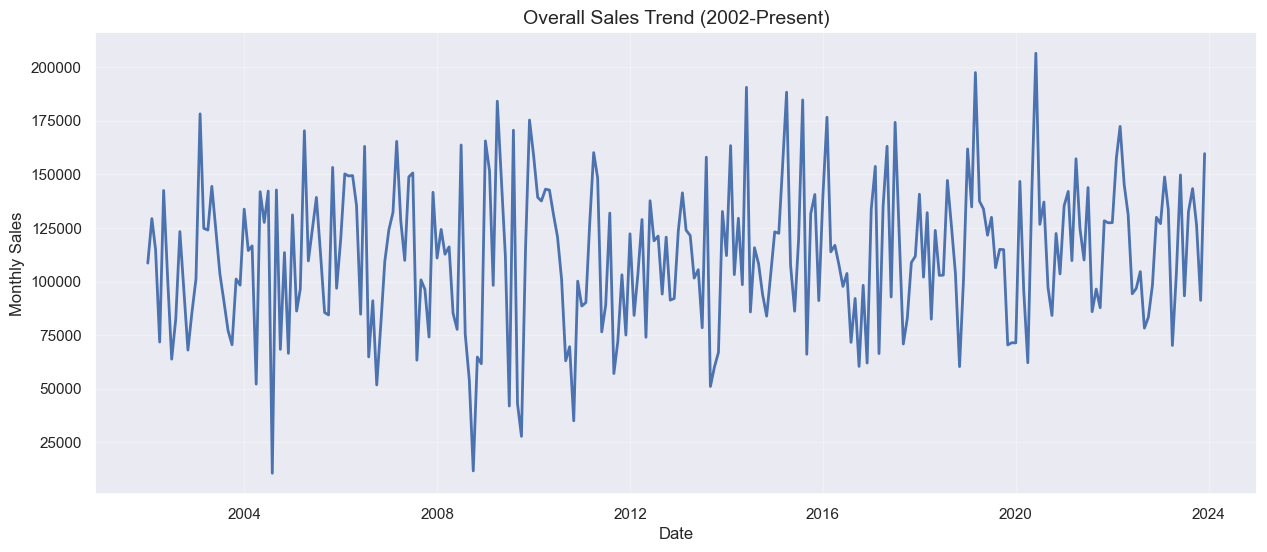

In [11]:
# Overall trend visualization
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Monthly Sales'], linewidth=2)
plt.title('Overall Sales Trend (2002-Present)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Monthly Sales')
plt.grid(True, alpha=0.3)
plt.show()

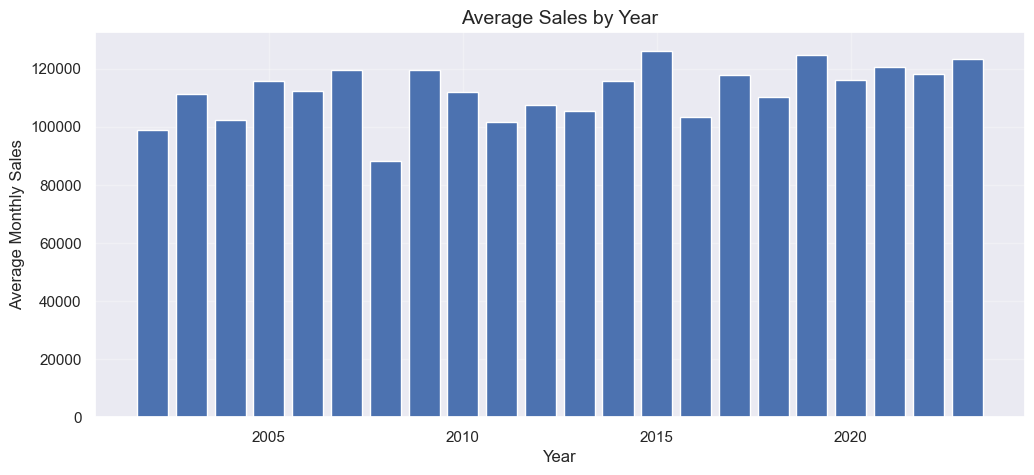

In [12]:
# Calculate and plot yearly trend
yearly_sales = df.groupby('Year')['Monthly Sales'].mean()
plt.figure(figsize=(12, 5))
plt.bar(yearly_sales.index, yearly_sales.values)
plt.title('Average Sales by Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Monthly Sales')
plt.grid(True, alpha=0.3)
plt.show()

In [13]:
# Print summary statistics
print("\nSales Trend Summary:")
print(f"Overall Average Monthly Sales: {df['Monthly Sales'].mean():.2f}")
print(f"Highest Sales Month: {df.loc[df['Monthly Sales'].idxmax()].name.strftime('%Y-%m')}")
print(f"Lowest Sales Month: {df.loc[df['Monthly Sales'].idxmin()].name.strftime('%Y-%m')}")


Sales Trend Summary:
Overall Average Monthly Sales: 112349.00
Highest Sales Month: 2020-06
Lowest Sales Month: 2004-08


## Brief analysis of the two graphs:

### Overall Sales Trend (2002-Present):
The line graph displays monthly sales over time, revealing considerable fluctuations in sales. Despite these fluctuations, no significant long-term upward or downward trend is apparent. Seasonal patterns or cyclical trends may be influencing the variations, but overall, sales remain within a consistent range between 25,000 and 200,000 units.

### Average Sales by Year:
The bar chart shows the yearly average of monthly sales. Sales performance appears relatively stable over the years, with slight dips during some periods (e.g., around 2009) and notable increases during others (e.g., post-2015). This stability indicates no major shifts in overall sales trends, suggesting a mature and steady market.

## 2. Are there any Seasonal Patterns in Sales?

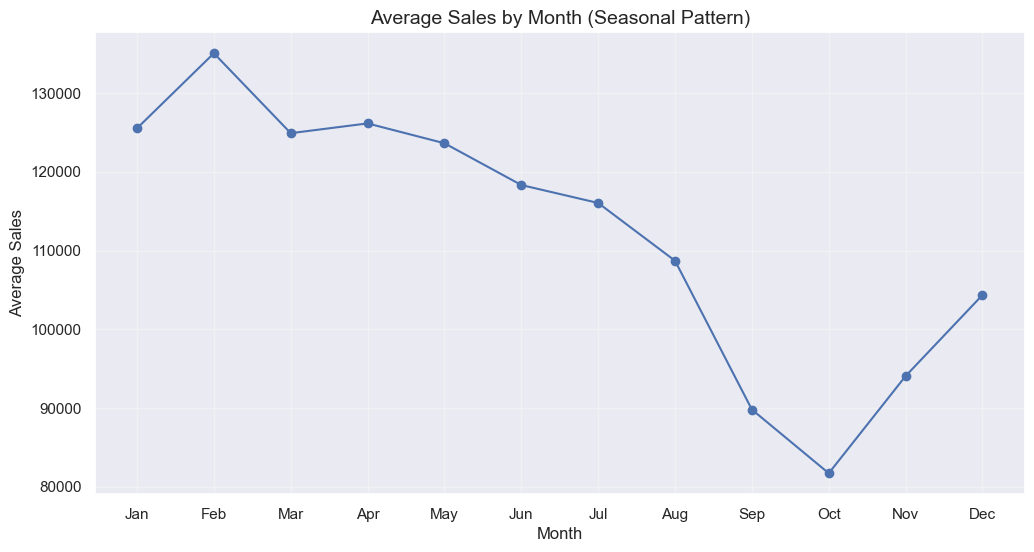

In [14]:
# Monthly seasonal pattern
monthly_avg = df.groupby('Month')['Monthly Sales'].mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.title('Average Sales by Month (Seasonal Pattern)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

## This graph illustrates the seasonal pattern in average sales by month:

### High Sales Months: 
Sales peak in February, followed by strong performance in January. This might indicate seasonality tied to early-year factors, such as promotions, holidays, or post-holiday spending.

### Declining Trend: 
Sales gradually decline from March through September, with the lowest performance observed in October.

### Recovery: 
Sales begin to rebound from November, indicating a potential lead-up to the year-end holiday season.

This pattern reveals a clear seasonal trend, where sales are strongest at the beginning of the year and weakest during the late third quarter.

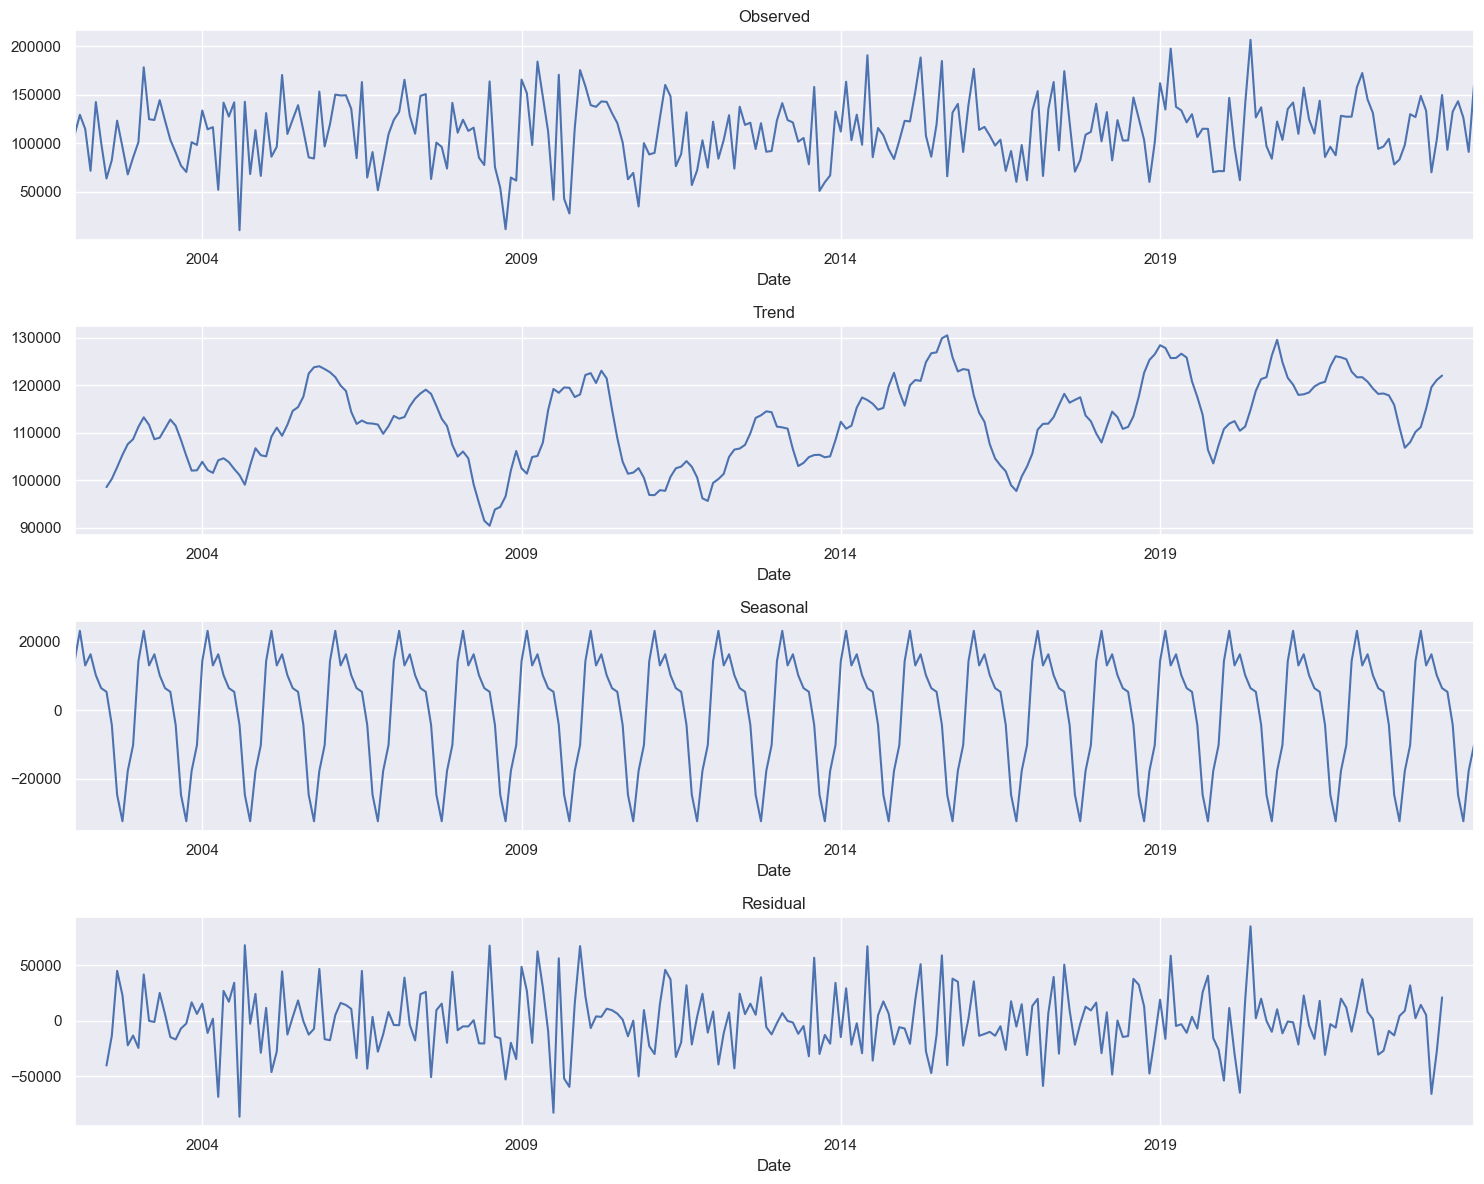

In [15]:
# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Monthly Sales'], period=12)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

In [16]:
# Print seasonal insights
import calendar

print("\nSeasonal Pattern Insights:")
peak_month = monthly_avg.idxmax()
low_month = monthly_avg.idxmin()
print(f"Peak Sales Month: {calendar.month_name[peak_month]}")
print(f"Lowest Sales Month: {calendar.month_name[low_month]}")


Seasonal Pattern Insights:
Peak Sales Month: February
Lowest Sales Month: October


## 3. How do Sales vary by Category and Platform?

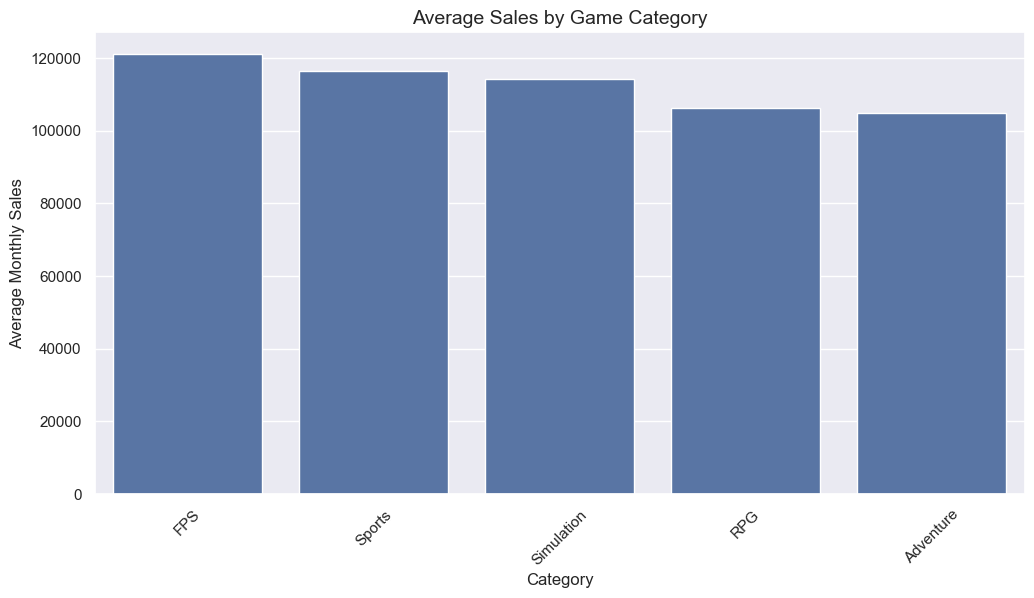

In [17]:
# Sales by Category
plt.figure(figsize=(12, 6))
category_sales = df.groupby('Category')['Monthly Sales'].mean().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Average Sales by Game Category', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Average Monthly Sales')
plt.show()

### Average Sales by Game Category
FPS games have the highest average monthly sales among all categories, followed closely by Sports and Simulation games. RPG and Adventure games lag slightly behind.
#### Suggestion: 
Focus marketing efforts and investment on FPS, Sports, and Simulation games to maximize revenue, while exploring strategies to boost interest in RPG and Adventure genres.

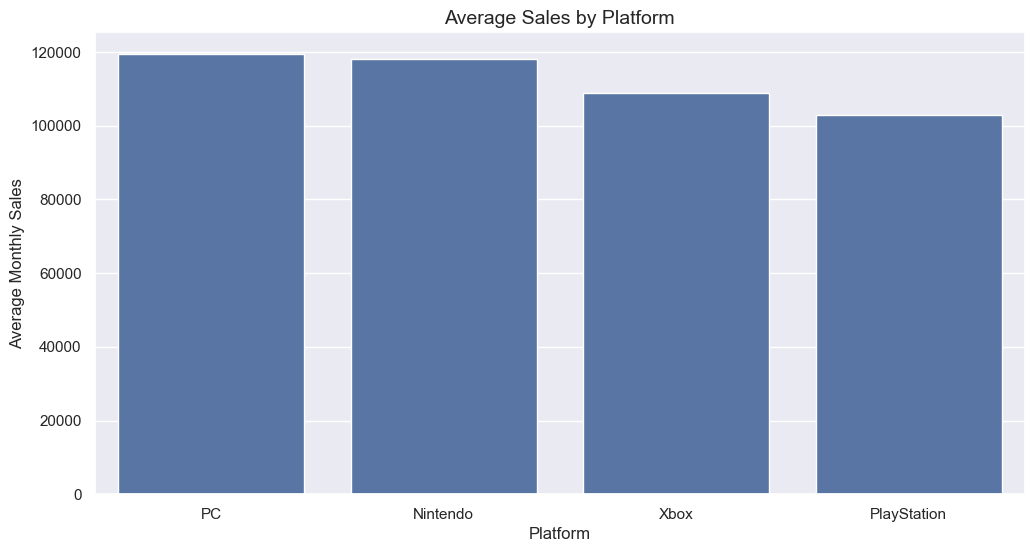

In [18]:
# Sales by Platform
plt.figure(figsize=(12, 6))
platform_sales = df.groupby('Platform')['Monthly Sales'].mean().sort_values(ascending=False)
sns.barplot(x=platform_sales.index, y=platform_sales.values)
plt.title('Average Sales by Platform', fontsize=14)
plt.xlabel('Platform')
plt.ylabel('Average Monthly Sales')
plt.show()

### Average Sales by Platform
PC and Nintendo are the leading platforms in terms of average monthly sales, followed closely by Xbox and PlayStation.
#### Suggestion: 
Prioritize releasing top-performing games on PC and Nintendo platforms, while developing exclusive content or promotional campaigns for Xbox and PlayStation to narrow the sales gap

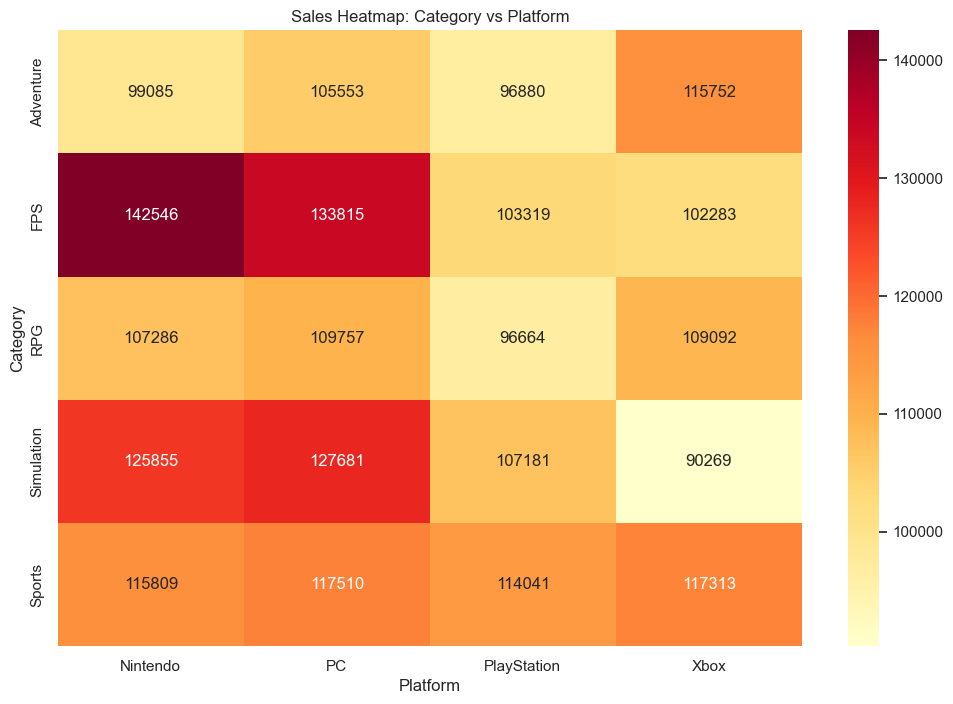

In [19]:
# Category-Platform Heatmap
pivot_table = df.pivot_table(values='Monthly Sales', 
                           index='Category', 
                           columns='Platform', 
                           aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Sales Heatmap: Category vs Platform')
plt.show()

### Sales by Category vs. Platform
The heatmap reveals that FPS games on Nintendo and PC generate the highest sales. Simulation games also perform well across all platforms, whereas Adventure games on PlayStation show comparatively lower sales.
#### Suggestion: 
Capitalize on the strong performance of FPS and Simulation games on Nintendo and PC platforms. For underperforming combinations like Adventure games on PlayStation, consider re-evaluating the game designs, pricing strategies, or marketing campaigns to improve engagement.

In [20]:
# Print top performers
print("\nTop Performing Categories and Platforms:")
print("\nTop 3 Categories:")
print(category_sales.head(3))
print("\nTop 3 Platforms:")
print(platform_sales.head(3))


Top Performing Categories and Platforms:

Top 3 Categories:
Category
FPS           121067.127660
Sports        116402.966102
Simulation    114074.745098
Name: Monthly Sales, dtype: float64

Top 3 Platforms:
Platform
PC          119367.393443
Nintendo    117983.782609
Xbox        108868.394737
Name: Monthly Sales, dtype: float64


## 4. How do Holidays and Promotions relate to the changes in Sales?

In [21]:
# Function to analyze impact of events (holidays/promotions) on video game sales
def analyze_game_sales_impact(df, event_column, window=1):
    """
    Analyze video game sales before, during, and after events
    
    Parameters:
    df: DataFrame with video game sales data
    event_column: 'Holiday' or 'Promotion'
    window: months to analyze before/after (default=1)
    """
    # Identify when events occurred (Holiday=1 or Promotion=1)
    event_periods = df[event_column] == 1
    results = []
    
    for idx in df[event_periods].index:
        # Define time periods
        before_start = idx - pd.DateOffset(months=window)
        after_end = idx + pd.DateOffset(months=window)
        
        # Get sales data and include category information
        before_data = df[before_start:idx]
        during_data = df[idx:idx]
        after_data = df[idx:after_end]
        
        # Calculate average sales for each period
        before_sales = before_data['Monthly Sales'].mean()
        during_sales = during_data['Monthly Sales'].mean()
        after_sales = after_data['Monthly Sales'].mean()
        
        # Get category and platform information for the event period
        category = during_data['Category'].iloc[0] if not during_data.empty else 'Unknown'
        platform = during_data['Platform'].iloc[0] if not during_data.empty else 'Unknown'
        
        results.append({
            'Date': idx,
            'Category': category,
            'Platform': platform,
            'Before_Sales': before_sales,
            'During_Sales': during_sales,
            'After_Sales': after_sales,
            'Percent_Change_Before': ((during_sales - before_sales) / before_sales * 100) if before_sales != 0 else 0,
            'Percent_Change_After': ((after_sales - during_sales) / during_sales * 100) if during_sales != 0 else 0
        })
    
    return pd.DataFrame(results)

In [22]:
# Analyze holiday impact
holiday_impact = analyze_game_sales_impact(df, 'Holiday')

In [23]:
# Print holiday analysis results
print("\nHoliday Impact Analysis:")
print("\nAverage Impact of Holidays on Video Game Sales:")
print(f"Before Holiday: {holiday_impact['Before_Sales'].mean():.2f}")
print(f"During Holiday: {holiday_impact['During_Sales'].mean():.2f}")
print(f"After Holiday: {holiday_impact['After_Sales'].mean():.2f}")
print(f"\nAverage % Change Before Holiday: {holiday_impact['Percent_Change_Before'].mean():.2f}%")
print(f"Average % Change After Holiday: {holiday_impact['Percent_Change_After'].mean():.2f}%")


Holiday Impact Analysis:

Average Impact of Holidays on Video Game Sales:
Before Holiday: 106489.76
During Holiday: 114933.55
After Holiday: 123186.67

Average % Change Before Holiday: 8.12%
Average % Change After Holiday: 10.79%


In [24]:
# Analysis by category during holidays
print("\nHoliday Impact by Game Category:")
category_impact = holiday_impact.groupby('Category')[['Before_Sales', 'During_Sales', 'After_Sales']].mean()
print(category_impact)



Holiday Impact by Game Category:
             Before_Sales   During_Sales    After_Sales
Category                                               
Adventure   109093.541667  112422.416667  124391.375000
FPS         108149.100000  108524.600000  117693.500000
RPG         106356.600000  124631.900000  128765.650000
Simulation  115393.000000  125499.166667  134604.416667
Sports       98159.772727  106006.363636  113069.681818


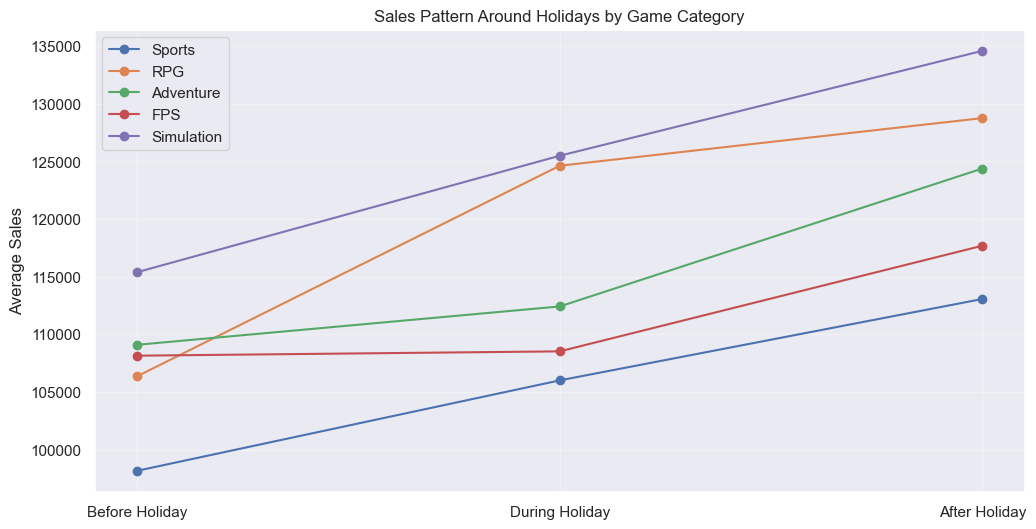

In [25]:
# Visualize holiday impact
plt.figure(figsize=(12, 6))
for category in holiday_impact['Category'].unique():
    cat_data = holiday_impact[holiday_impact['Category'] == category]
    plt.plot([1, 2, 3], 
            [cat_data['Before_Sales'].mean(), 
             cat_data['During_Sales'].mean(), 
             cat_data['After_Sales'].mean()],
            marker='o',
            label=category)

plt.title('Sales Pattern Around Holidays by Game Category')
plt.xticks([1, 2, 3], ['Before Holiday', 'During Holiday', 'After Holiday'])
plt.ylabel('Average Sales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Holiday Sales Patterns:

Sales increase for all game categories during holidays, with Simulation and RPG games showing the largest boost.
Post-holiday sales remain higher than pre-holiday levels, indicating sustained engagement.

In [26]:
# Analyze promotion impact
promotion_impact = analyze_game_sales_impact(df, 'Promotion')

In [27]:
# Print promotion analysis results
print("\nPromotion Impact Analysis:")
print("\nAverage Impact of Promotions on Video Game Sales:")
print(f"Before Promotion: {promotion_impact['Before_Sales'].mean():.2f}")
print(f"During Promotion: {promotion_impact['During_Sales'].mean():.2f}")
print(f"After Promotion: {promotion_impact['After_Sales'].mean():.2f}")
print(f"\nAverage % Change Before Promotion: {promotion_impact['Percent_Change_Before'].mean():.2f}%")
print(f"Average % Change After Promotion: {promotion_impact['Percent_Change_After'].mean():.2f}%")


Promotion Impact Analysis:

Average Impact of Promotions on Video Game Sales:
Before Promotion: 113121.71
During Promotion: 113723.30
After Promotion: 113570.31

Average % Change Before Promotion: 1.61%
Average % Change After Promotion: 4.43%


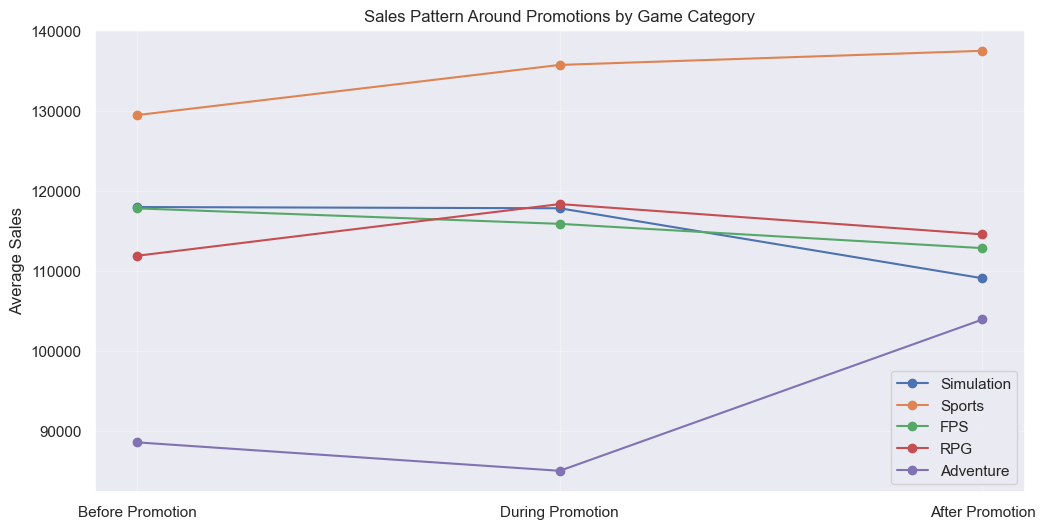

In [28]:
# Visualize holiday impact
plt.figure(figsize=(12, 6))
for category in promotion_impact['Category'].unique():
    cat_data = promotion_impact[promotion_impact['Category'] == category]
    plt.plot([1, 2, 3], 
            [cat_data['Before_Sales'].mean(), 
             cat_data['During_Sales'].mean(), 
             cat_data['After_Sales'].mean()],
            marker='o',
            label=category)

plt.title('Sales Pattern Around Promotions by Game Category')
plt.xticks([1, 2, 3], ['Before Promotion', 'During Promotion', 'After Promotion'])
plt.ylabel('Average Sales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Promotion Sales Patterns:

Promotions have a mixed effect: Adventure games see significant growth after promotions, while Simulation games decline during and recover afterward.
Sports games show consistent growth, leveraging promotions effectively.

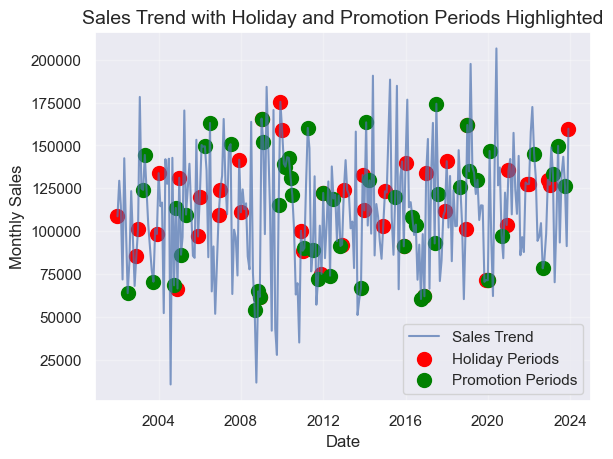

In [29]:
# Calculate monthly averages
monthly_avg = df.groupby(['Year', 'Month'])['Monthly Sales'].mean().reset_index()
# Create proper datetime index
monthly_avg['Date'] = pd.to_datetime(monthly_avg[['Year', 'Month']].assign(DAY=1))
# Plot overall sales trend
plt.plot(monthly_avg['Date'], monthly_avg['Monthly Sales'], 
         label='Sales Trend', alpha=0.7)

# Identify and plot holiday periods
holiday_periods = df[df['Holiday'] == 1].index
plt.scatter(holiday_periods, df.loc[holiday_periods, 'Monthly Sales'], 
           color='red', label='Holiday Periods', s=100)

# Identify and plot promotion periods
promo_periods = df[df['Promotion'] == 1].index
plt.scatter(promo_periods, df.loc[promo_periods, 'Monthly Sales'], 
           color='green', label='Promotion Periods', s=100)

# Add chart labels and formatting
plt.title('Sales Trend with Holiday and Promotion Periods Highlighted', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Monthly Sales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### Overall Trends:

The timeline highlights holiday and promotional periods, showing spikes in sales during these events. Both factors are critical for driving sales across categories.

## 5. Are Sales influenced by the day of the week?

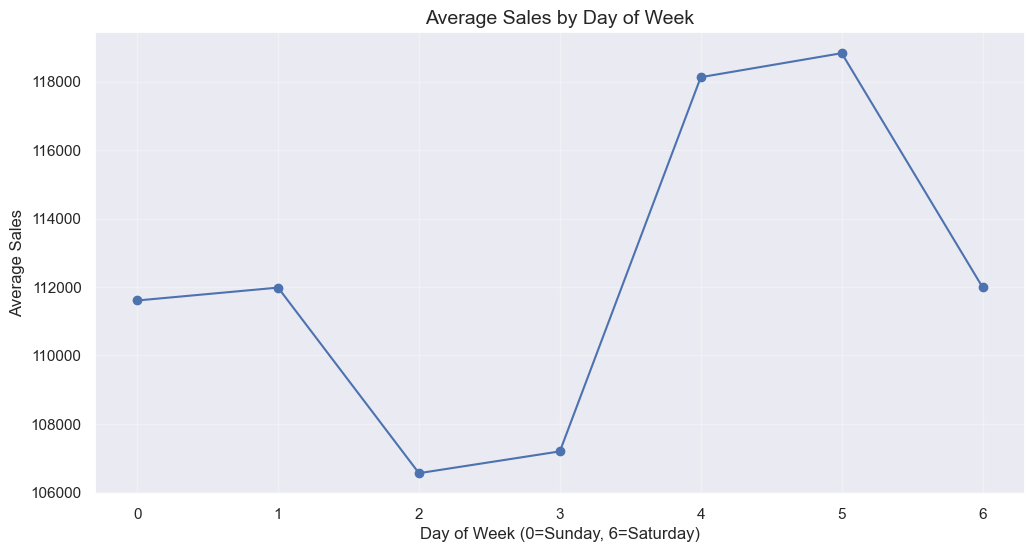

In [30]:
# Average sales by day of week
plt.figure(figsize=(12, 6))
daily_sales = df.groupby('DayOfWeek')['Monthly Sales'].mean()
daily_sales_sorted = daily_sales.reindex([0,1,2,3,4,5,6])  # Sort by actual days
plt.plot(daily_sales_sorted.index, daily_sales_sorted.values, marker='o')
plt.title('Average Sales by Day of Week', fontsize=14)
plt.xlabel('Day of Week (0=Sunday, 6=Saturday)')
plt.ylabel('Average Sales')
plt.grid(True, alpha=0.3)
plt.show()

### Average Sales (Line Chart)

The chart shows how average sales change across the week.
#### What stands out?
Sales are pretty steady on Sunday (Day 0) and Monday (Day 1), but they take a noticeable dip on Tuesday (Day 2), hitting the lowest point of the week.
From there, things start to pick up, with a sharp climb from Wednesday (Day 3) to Friday (Day 5). Thursday and Friday are the best days for sales, with Friday slightly edging out.
However, things drop again on Saturday (Day 6), making it another relatively weak day.

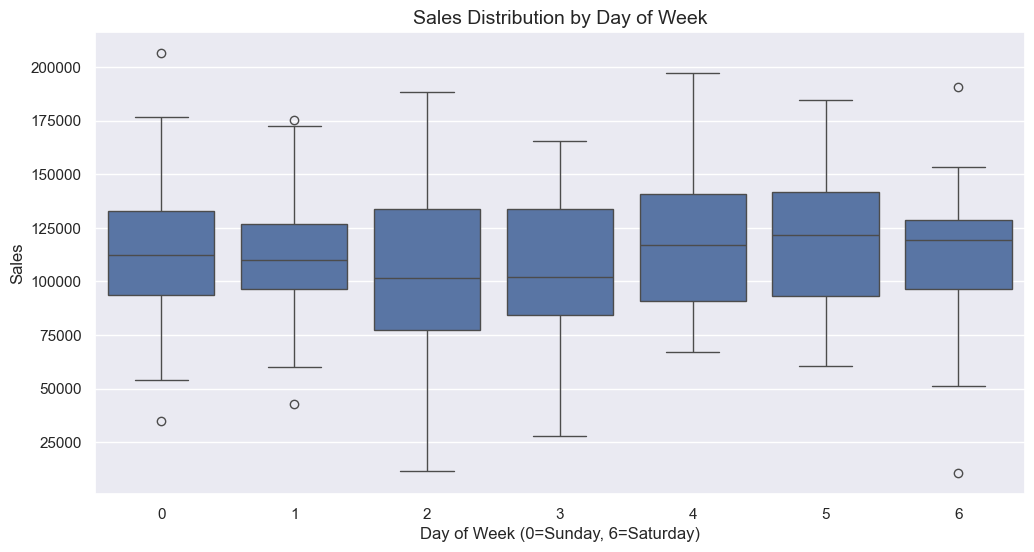

In [31]:
# Box plot for sales distribution by day
plt.figure(figsize=(12, 6))
sns.boxplot(x='DayOfWeek', y='Monthly Sales', data=df)
plt.title('Sales Distribution by Day of Week', fontsize=14)
plt.xlabel('Day of Week (0=Sunday, 6=Saturday)')
plt.ylabel('Sales')
plt.show()

### Sales Distribution (Box Plot)

This plot gives us a deeper look at the spread of sales for each day, not just the averages.
#### What’s interesting?
Tuesday (Day 2) stands out for having the widest range in sales—some days are really low, while others are quite high.
Friday (Day 5) not only has strong average sales, but its median (middle value) is also high, meaning it’s consistently a good day.
Saturday (Day 6), on the other hand, doesn’t just have lower average sales—it’s clear from the box plot that sales are generally weaker compared to other days.

In [32]:
# Print day of week insights
print("\nDay of Week Analysis:")
daily_stats = df.groupby('DayOfWeek')['Monthly Sales'].agg(['mean', 'std']).round(2)
print(daily_stats)
print(f"\nBest Performing Day: Day {daily_stats['mean'].idxmax()} (Average Sales: {daily_stats['mean'].max():.2f})")
print(f"Worst Performing Day: Day {daily_stats['mean'].idxmin()} (Average Sales: {daily_stats['mean'].min():.2f})")


Day of Week Analysis:
                mean       std
DayOfWeek                     
0          111605.17  34877.79
1          111981.82  30606.17
2          106559.50  38712.58
3          107196.08  35389.94
4          118130.72  32957.13
5          118832.35  33790.96
6          111990.76  33036.94

Best Performing Day: Day 5 (Average Sales: 118832.35)
Worst Performing Day: Day 2 (Average Sales: 106559.50)


### Stationarity Check

In [33]:
from statsmodels.tsa.stattools import adfuller, acf, pacf

def check_stationarity(series):
    # Perform Augmented Dickey-Fuller test
    result = adfuller(series)
    print('Augmented Dickey-Fuller Test:')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

check_stationarity(df['Monthly Sales'])

Augmented Dickey-Fuller Test:
ADF Statistic: -4.471046070251254
p-value: 0.00022173509005268892
Critical values:
	1%: -3.4565688966099373
	5%: -2.8730786194395455
	10%: -2.5729189953388762


### Augmented Dickey-Fuller Test Summary:
The ADF test checks for stationarity in the time series. 

- **Null Hypothesis (H₀):** The series is non-stationary (has a unit root).
- **Test Results:**
  - ADF Statistic: -4.471
  - p-value: 0.00022
  - Critical Values: 
    - 1%: -3.457, 5%: -2.873, 10%: -2.573

**Conclusion:** Since the ADF statistic is less than the 1% critical value and the p-value is significantly below 0.05, we reject the null hypothesis. The series is stationary and does not require differencing.


### ACF and PACF Analysis

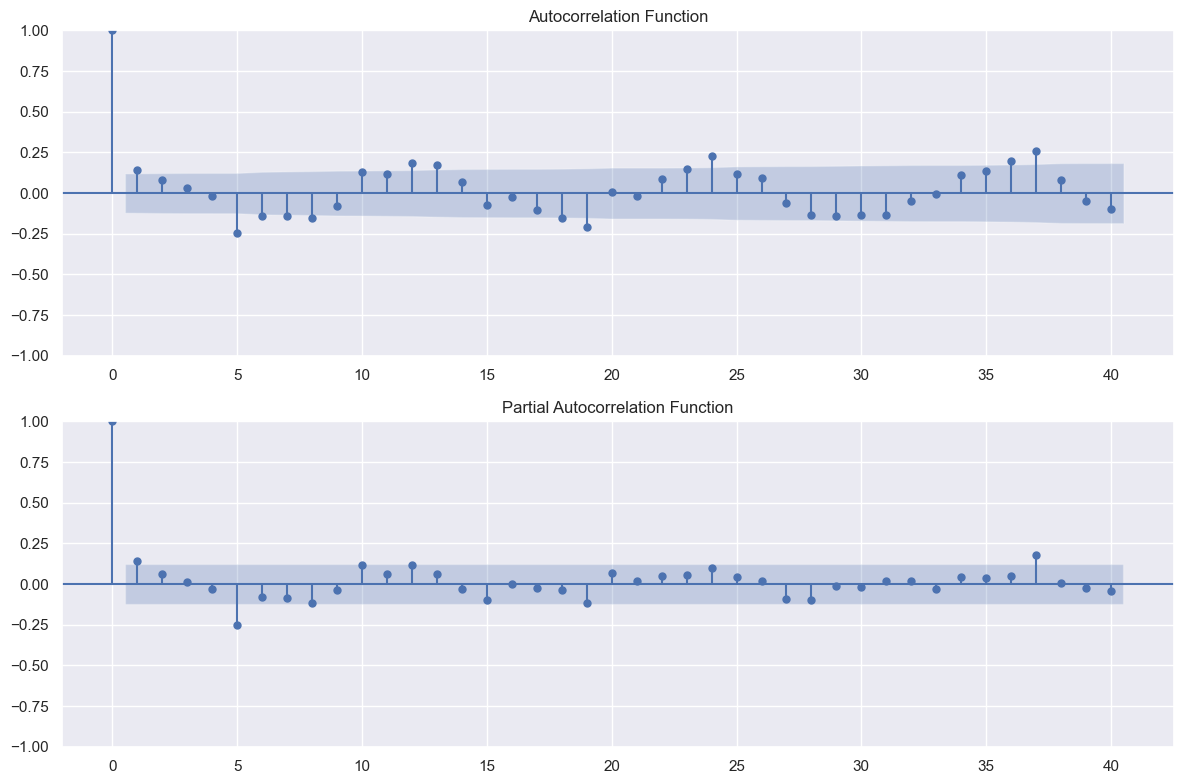

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF Plot
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(df['Monthly Sales'], lags=40, alpha=0.05, ax=ax[0])  # alpha=0.05 ensures 95% CI
ax[0].set_title('Autocorrelation Function')

# PACF Plot
plot_pacf(df['Monthly Sales'], lags=40, alpha=0.05, ax=ax[1], method='ywm')  # alpha=0.05 ensures 95% CI
ax[1].set_title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


### ACF and PACF Analysis
The Autocorrelation Function (ACF) shows a significant spike at lag 1, with a gradual decay afterward.
The Partial Autocorrelation Function (PACF) shows a significant spike at lag 1, with a sharp cutoff.
These plots are used to identify parameters for time series models:

##### For ARIMA: Helps set the p (AR order) and q (MA order).
##### For ETS: Helps understand the series' autocorrelation structure to configure smoothing parameters.

In [43]:
data = df.to_csv('clean_monthly_sales_data.csv', index=False)